# ImportanceSampling-RareEvent.ipynb
Importance sampling for estimating a rare event probability $P(X>3)$ under $X\sim\mathcal{N}(0,1)$.

True P(X>3) = 0.0013498980316301035
Saved figure to figs/IS_rare_event_panels.png


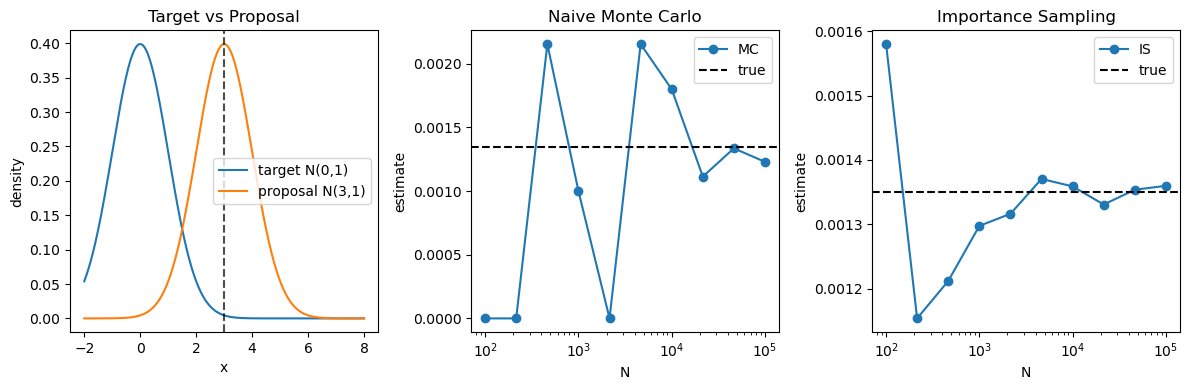

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Ensure figs directory exists
os.makedirs("figs", exist_ok=True)

# Target and proposal
target = norm(loc=0.0, scale=1.0)
proposal = norm(loc=3.0, scale=1.0)

def mc_estimate(N, rng):
    """Naive Monte Carlo using samples from N(0,1)."""
    x = target.rvs(size=N, random_state=rng)
    return np.mean(x > 3.0)

def is_estimate(N, rng):
    """Importance sampling using N(3,1) proposal."""
    x = proposal.rvs(size=N, random_state=rng)
    w = target.pdf(x) / proposal.pdf(x)
    return np.mean(w * (x > 3.0)), x, w

# Ground truth
true_prob = 1.0 - target.cdf(3.0)
print("True P(X>3) =", true_prob)

rng = np.random.default_rng(123)

# Panel 1: target vs proposal
xs = np.linspace(-2, 8, 500)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(xs, target.pdf(xs), label="target N(0,1)")
plt.plot(xs, proposal.pdf(xs), label="proposal N(3,1)")
plt.axvline(3.0, color="k", linestyle="--", alpha=0.7)
plt.title("Target vs Proposal")
plt.legend()
plt.xlabel("x")
plt.ylabel("density")

# Panel 2 and 3: MC vs IS convergence
Ns = np.logspace(2, 5, 10, dtype=int)
mc_means = []
is_means = []
for N in Ns:
    mc_means.append(mc_estimate(N, rng))
    est_is, _, _ = is_estimate(N, rng)
    is_means.append(est_is)

plt.subplot(1, 3, 2)
plt.semilogx(Ns, mc_means, marker="o", label="MC")
plt.axhline(true_prob, color="k", linestyle="--", label="true")
plt.title("Naive Monte Carlo")
plt.xlabel("N")
plt.ylabel("estimate")
plt.legend()

plt.subplot(1, 3, 3)
plt.semilogx(Ns, is_means, marker="o", label="IS")
plt.axhline(true_prob, color="k", linestyle="--", label="true")
plt.title("Importance Sampling")
plt.xlabel("N")
plt.ylabel("estimate")
plt.legend()

plt.tight_layout()
savepath = "figs/IS_rare_event_panels.png"
plt.savefig(savepath, dpi=150, bbox_inches="tight")
print(f"Saved figure to {savepath}")
plt.show()